In [1]:
import cleanup_world
import gym
from gym import register
from matplotlib import pyplot as plt
import numpy as np
import pickle
from copy import deepcopy
from trajectory_extraction import return_dataset
register(id='2DPickup-v2', entry_point='cleanup_world.envs:PickupWorld', kwargs={'render':True})
env = gym.make('2DPickup-v2')
# env = gym.make('2DPickup-v0')
obs = env.reset()
eps = 10000
done = False
rew_list = []

chosen_goal 36


In [2]:
obs,rew,done,_ = env.step(0)
# env.goal_orientation

In [7]:
rew

10

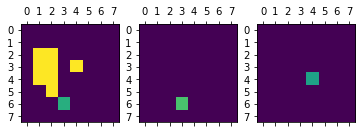

In [5]:
obs,rew,done,_ = env.step(0)
plt.subplot(1,3,1)
plt.matshow(obs['observation'].reshape(8,8),fignum=False)
plt.subplot(1,3,2)
plt.matshow(obs['achieved_goal'].reshape(8,8),fignum=False,vmin=0,vmax=1.75)
plt.subplot(1,3,3)
plt.matshow(obs['desired_goal'].reshape(8,8),fignum=False,vmin=0,vmax=1.75)



In [2]:
files = [[0,1,2,3,4,5,6,7],
        [0,1,2,3,4,5,6,7],
        [0,1,2,3,4,5,6,7],
        [0,1,2,3],
        [0,1,2,3,5,6,7],
        [0,1,2,3,5,6,7],
        [0,1,2,3,6,7],
        [0,1,2,3,4,6,7],
        [0,1,2,3,4,5,6,7],
        [0,1,2,3,5,6,7]]
observations = []
goals = []
orientation = []
for i in range(len(files)):
    subject = files[i]
    for j in subject:
        with open('./clean_data/subject_'+str(i+1)+'/eps_'+str(j)+'.pkl','rb') as f:
            data = pickle.load(f)
            X_raw, Y_raw = return_dataset(deepcopy(data))
            if np.sum(X_raw[0][0,:]-np.floor(X_raw[0][0,:]))==0:
                X_raw[0][0,:]+(X_raw[0][0,:]>0).astype('float')*0.25
            X, Y = [],[]
            for k in range(len(X_raw)):
                if len(X_raw[k].shape)==2:
                    X.append(X_raw[k])
                    Y.append(Y_raw[k])
            observations.extend([x.reshape(-1,8,8,2) for x in X])
            goals.extend([np.argmax(y[:-1]) for y in Y])
            # print([x.shape for x in X])
            agent_location_final = [np.argwhere(np.floor(x[-1,:])==1) for x in X]
            # print(agent_location_final)
            orientation.extend([x[-1,loc][0,0]-1 for x,loc in zip(X, agent_location_final)])

In [110]:
 with open('./clean_data/subject_1/eps_0.pkl','rb') as f:
            data = pickle.load(f)
            X_raw, Y_raw = return_dataset(deepcopy(data))
X_raw[0][0,:]+(X_raw[0][0,:]>0).astype('float')*0.25

array([10.25,  0.  , 10.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  2.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 10.25,  0.  ,
       10.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , 10.25,  0.  , 10.25,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  3.25,  0.  ,  0.  ,  0.  ,  2.25,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.25,  0.  ,  0.  ,  0.  ,
        3.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.25,  0.  ,  2.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  3.25,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        3.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ]

In [3]:
# with open('./clean_data/all_trajectories.pkl','wb') as f:
#      pickle.dump({'observations':observations,'goals':goals,'orientation':orientation}, f)


In [6]:
obs['desired_goal'].reshape(8,8,2)[:,:,1]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [2]:
for i in range(eps):
    while not done:
        obs,rew,done,_ = env.step(env.action_space.sample())
        print(rew)
    done = False
    rew_list.append(rew)
    env.reset()

75
0.90625
0.9375
0.953125
0.921875
0.921875
0.921875
0.953125
0.96875
0.984375
0.953125
0.9375
0.921875
0.90625
0.90625
0.921875
0.9375
0.921875
0.9375
0.921875
0.90625
0.921875
0.90625
0.90625
0.921875
0.921875
0.921875
0.9375
0.921875
0.921875
0.9375
0.9375
0.9375
0.9375
0.921875
0.953125
0.96875
0.984375
0.984375
0.953125
0.953125
0.984375
0.953125
0.953125
0.9375
0.9375
0.9375
0.9375
0.9375
0.921875
0.921875
0.9375
0.9375
0.890625
0.890625
0.890625
0.890625
0.890625
0.875
0.90625
0.921875
0.921875
0.921875
0.890625
0.890625
0.875
0.90625
0.90625
0.90625
0.90625
0.90625
0.90625
0.875
0.859375
0.890625
0.890625
0.890625
0.859375
0.859375
0.890625
0.890625
0.859375
0.859375
0.859375
0.859375
0.890625
0.890625
0.890625
0.890625
0.90625
0.875
0.90625
0.921875
0.890625
0.921875
0.921875
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.90625
0.9375
0.9375
0.9375
0.9375
0.953125
0.921875
0.921875
0.953125
0.953125
0.953125
0.953125
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375

KeyboardInterrupt: 